In [21]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


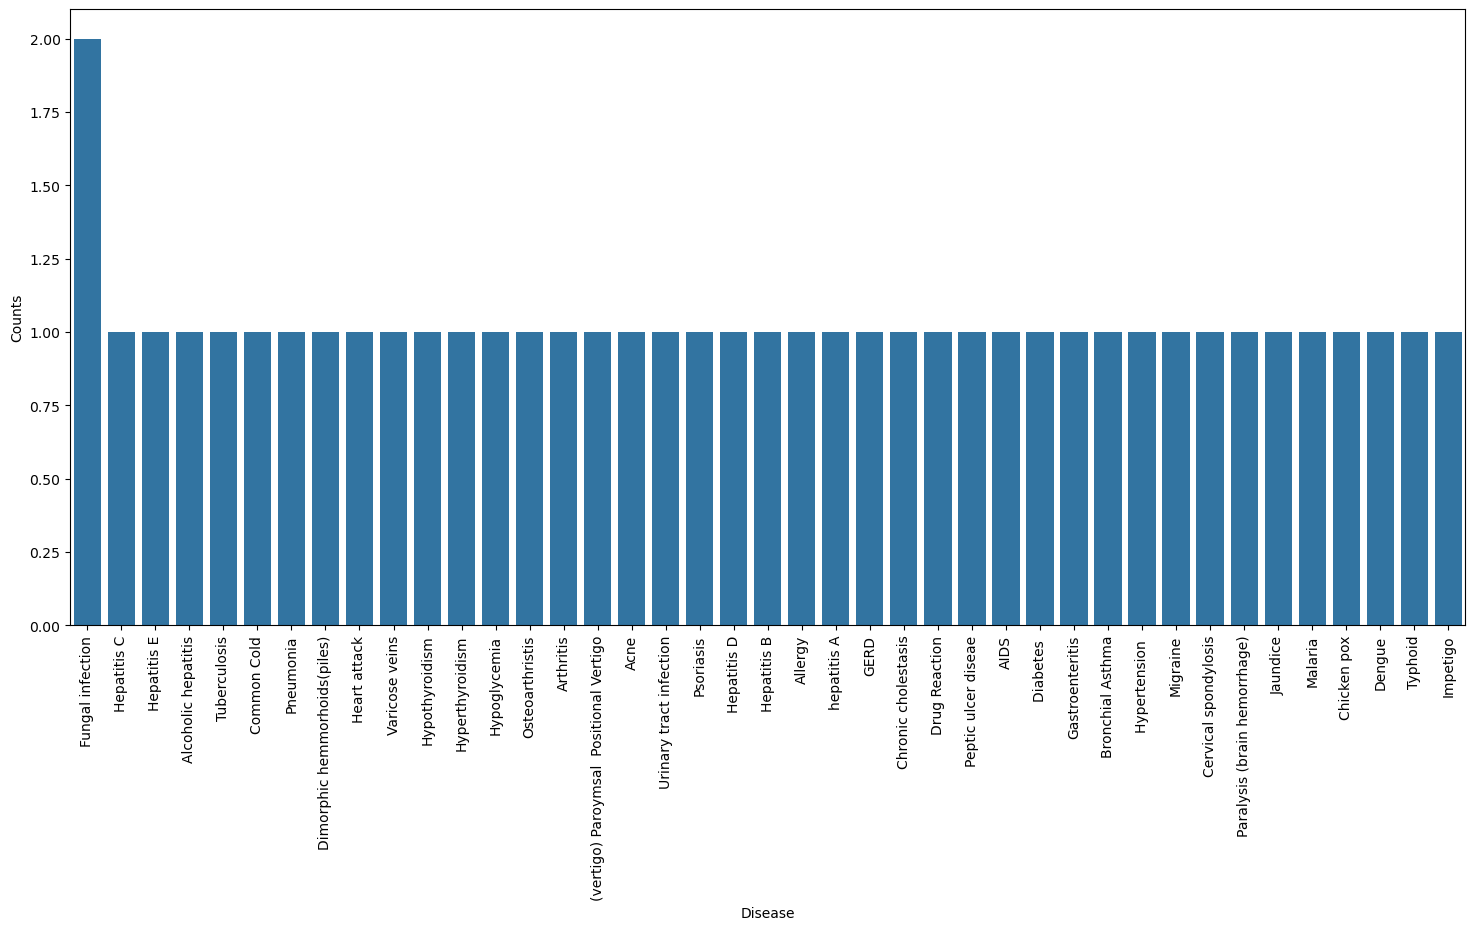

In [25]:
# Reading the train.csv by removing the 
# last column since it's an empty column
DATA_PATH = "dataset/disease.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [19]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


In [27]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (33, 132), (33,)
Test: (9, 132), (9,)


In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load the training data
train_data_path = "./dataset/disease.csv"  # Make sure this path is correct

try:
    train_data = pd.read_csv(train_data_path).dropna(axis=1)
except FileNotFoundError:
    print(f"File not found: {train_data_path}")
    train_data = None

if train_data is not None:
    # Splitting features (X) and labels (y)
    X = train_data.iloc[:, :-1]
    y = train_data.iloc[:, -1]

    # Encoding labels if necessary
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Check class distribution
    unique, counts = np.unique(y, return_counts=True)
    class_distribution = dict(zip(unique, counts))
    print("Class distribution:", class_distribution)

    # Determine the minimum class size
    min_class_size = min(counts)
    
    # Set n_splits to be the minimum of 10 or the smallest class size, but at least 2
    n_splits = max(2, min(10, min_class_size))
    print(f"Using {n_splits} splits for cross-validation.")

    # Use StratifiedKFold to ensure equal distribution of classes in each fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=18)

    # Initializing the models
    models = {
        "SVC": SVC(),
        "Gaussian NB": GaussianNB(),
        "Random Forest": RandomForestClassifier(random_state=18)
    }

    # Performing cross-validation
    for model_name in models:
        model = models[model_name]
        scores = cross_val_score(model, X, y, cv=skf, n_jobs=-1, scoring='accuracy')
        print("=="*30)
        print(model_name)
        print(f"Scores: {scores}")
        print(f"Mean Score: {np.mean(scores)}")
else:
    print("Training data could not be loaded.")


Class distribution: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 2, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1}
Using 2 splits for cross-validation.


C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


SVC
Scores: [0.04761905 0.04761905]
Mean Score: 0.047619047619047616


C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Gaussian NB
Scores: [0.04761905 0.        ]
Mean Score: 0.023809523809523808


C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Random Forest
Scores: [0.04761905 0.        ]
Mean Score: 0.023809523809523808


In [37]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load the training data
train_data_path = "./dataset/disease.csv"  # Make sure this path is correct

try:
    train_data = pd.read_csv(train_data_path).dropna(axis=1)
except FileNotFoundError:
    print(f"File not found: {train_data_path}")
    train_data = None

if train_data is not None:
    # Splitting features (X) and labels (y)
    X = train_data.iloc[:, :-1]
    y = train_data.iloc[:, -1]

    # Encoding labels if necessary
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Check class distribution
    unique, counts = np.unique(y, return_counts=True)
    class_distribution = dict(zip(unique, counts))
    print("Class distribution:", class_distribution)

    # Determine the minimum class size
    min_class_size = min(counts)
    
    # Set n_splits to be the minimum of 10 or the smallest class size, but at least 2
    n_splits = max(2, min(10, min_class_size))
    print(f"Using {n_splits} splits for cross-validation.")

    # Use StratifiedKFold to ensure equal distribution of classes in each fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=18)

    # Defining scoring metric for k-fold cross validation
    def cv_scoring(estimator, X, y):
        return accuracy_score(y, estimator.predict(X))

    # Initializing Models
    models = {
        "SVC": SVC(),
        "Gaussian NB": GaussianNB(),
        "Random Forest": RandomForestClassifier(random_state=18)
    }

    # Producing cross-validation scores for the models
    for model_name in models:
        model = models[model_name]
        scores = cross_val_score(model, X, y, cv=skf, 
                                 n_jobs=-1, 
                                 scoring='accuracy')  # Use built-in 'accuracy' scoring
        print("=="*30)
        print(model_name)
        print(f"Scores: {scores}")
        print(f"Mean Score: {np.mean(scores)}")
else:
    print("Training data could not be loaded.")


Class distribution: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 2, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1}
Using 2 splits for cross-validation.


C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


SVC
Scores: [0.04761905 0.04761905]
Mean Score: 0.047619047619047616


C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Gaussian NB
Scores: [0.04761905 0.        ]
Mean Score: 0.023809523809523808


C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Random Forest
Scores: [0.04761905 0.        ]
Mean Score: 0.023809523809523808


Class distribution: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Accuracy on train data by SVM Classifier: 93.94%
Accuracy on test data by SVM Classifier: 0.00%


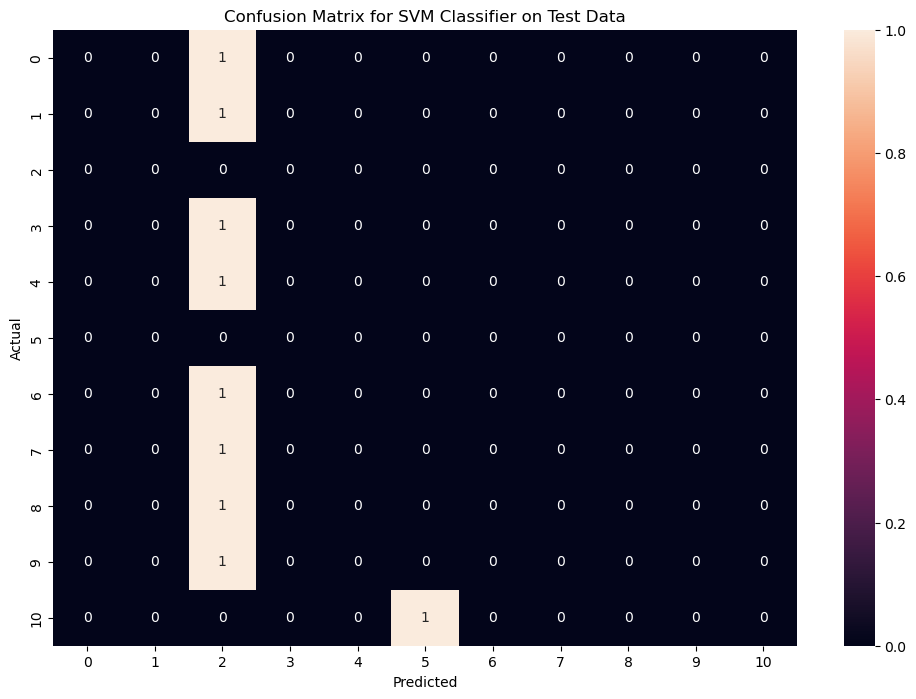

Accuracy on train data by Naive Bayes Classifier: 100.00%
Accuracy on test data by Naive Bayes Classifier: 0.00%


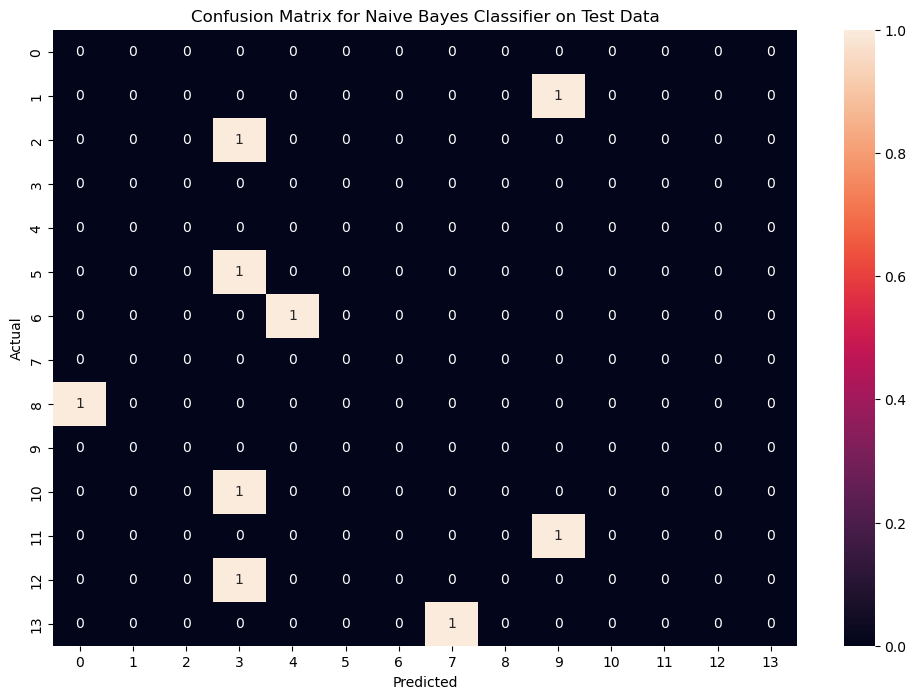

Accuracy on train data by Random Forest Classifier: 100.00%
Accuracy on test data by Random Forest Classifier: 0.00%


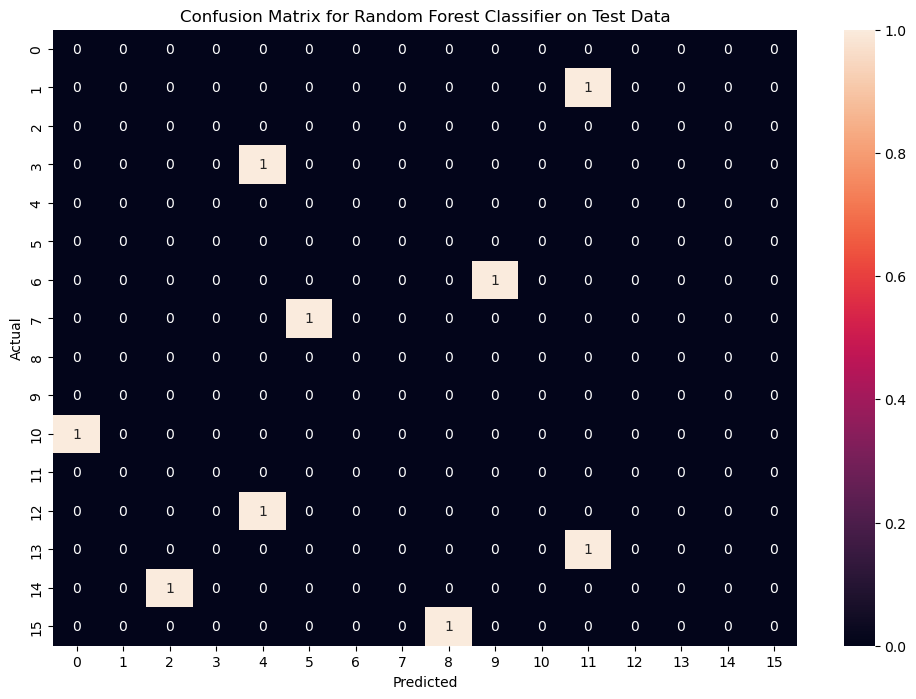

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the training data
train_data_path = "./dataset/disease.csv"  # Make sure this path is correct

try:
    train_data = pd.read_csv(train_data_path).dropna(axis=1)
except FileNotFoundError:
    print(f"File not found: {train_data_path}")
    train_data = None

if train_data is not None:
    # Splitting features (X) and labels (y)
    X = train_data.iloc[:, :-1]
    y = train_data.iloc[:, -1]

    # Encoding labels if necessary
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Check the class distribution
    class_counts = np.bincount(y)
    print("Class distribution:", class_counts)

    # If any class has less than 2 samples, modify accordingly
    if np.min(class_counts) < 2:
        print("Warning: One or more classes have fewer than 2 samples. Proceeding with a random split.")
        # You can remove or combine classes here if needed
        # For simplicity, we'll just proceed without stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        # Splitting the data into training and testing sets (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Training and testing SVM Classifier
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    preds = svm_model.predict(X_test)

    print(f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train, svm_model.predict(X_train)) * 100:.2f}%")
    print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds) * 100:.2f}%")
    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True, fmt='d')
    plt.title("Confusion Matrix for SVM Classifier on Test Data")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Training and testing Naive Bayes Classifier
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    preds = nb_model.predict(X_test)

    print(f"Accuracy on train data by Naive Bayes Classifier: {accuracy_score(y_train, nb_model.predict(X_train)) * 100:.2f}%")
    print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds) * 100:.2f}%")
    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True, fmt='d')
    plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Training and testing Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=18)
    rf_model.fit(X_train, y_train)
    preds = rf_model.predict(X_test)

    print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train)) * 100:.2f}%")
    print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds) * 100:.2f}%")
    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True, fmt='d')
    plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
else:
    print("Training data could not be loaded.")


Accuracy on Test dataset by the combined model: 100.00


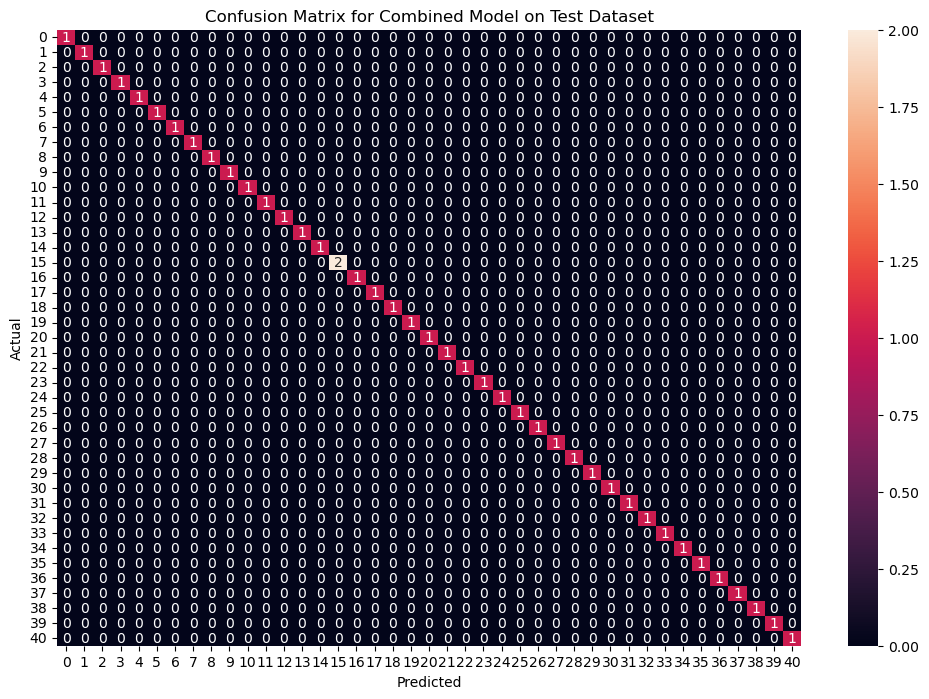

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import os

# Load the training data
train_data_path = "./dataset/disease.csv"  # Make sure this path is correct

try:
    train_data = pd.read_csv(train_data_path).dropna(axis=1)
except FileNotFoundError:
    print(f"File not found: {train_data_path}")
    train_data = None

if train_data is not None:
    # Splitting features (X) and labels (y)
    X = train_data.iloc[:, :-1]
    y = train_data.iloc[:, -1]

    # Encoding labels if necessary
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Training the models on whole data
    final_svm_model = SVC()
    final_nb_model = GaussianNB()
    final_rf_model = RandomForestClassifier(random_state=18)
    final_svm_model.fit(X, y)
    final_nb_model.fit(X, y)
    final_rf_model.fit(X, y)

    # Reading the test data
    test_data_path = "./dataset/disease.csv"  # Ensure this path is correct
    if os.path.exists(test_data_path):
        test_data = pd.read_csv(test_data_path).dropna(axis=1)

        test_X = test_data.iloc[:, :-1]
        test_Y = encoder.transform(test_data.iloc[:, -1])

        # Making predictions by taking mode of predictions 
        # made by all the classifiers
        svm_preds = final_svm_model.predict(test_X)
        nb_preds = final_nb_model.predict(test_X)
        rf_preds = final_rf_model.predict(test_X)

        # Using stats.mode to calculate the final predictions
        # Flattening the result of stats.mode
        final_preds = stats.mode([svm_preds, nb_preds, rf_preds])[0].flatten()

        # Calculate accuracy on test dataset
        accuracy = accuracy_score(test_Y, final_preds) * 100
        print(f"Accuracy on Test dataset by the combined model: {accuracy:.2f}")

        cf_matrix = confusion_matrix(test_Y, final_preds)
        plt.figure(figsize=(12, 8))
        sns.heatmap(cf_matrix, annot=True, fmt='d')
        plt.title("Confusion Matrix for Combined Model on Test Dataset")
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()
    else:
        print(f"Test data file not found: {test_data_path}")
else:
    print("Training data could not be loaded.")


In [61]:
import numpy as np
import statistics

# Create symptom index dictionary to encode input symptoms into numerical form
symptoms = X.columns.values
symptom_index = { " ".join([i.capitalize() for i in value.split("_")]): index for index, value in enumerate(symptoms) }

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # Creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        symptom = symptom.strip()  # Trim whitespace
        if symptom in data_dict["symptom_index"]:  # Check if symptom exists
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
    
    # Reshaping the input data
    input_data = np.array(input_data).reshape(1, -1)

    # Generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # Making final prediction by taking mode of all predictions
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    
    return predictions

# Testing the function
result = predictDisease("Itching, Skin Rash, Nodal Skin Eruptions")
print(result)


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\ranji\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
